# Gaussian Mixture Model (GMM) on Iris

This notebook demonstrates an end-to-end workflow: data loading, preprocessing, model selection (AIC/BIC), fitting GMM, evaluation, and visualization.

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


In [2]:
# Load data
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
feature_names = iris['feature_names']
target_names = iris['target_names']
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for visualization
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_scaled)

In [4]:
# Model selection
from sklearn.metrics import silhouette_score
n_components_range = range(1,9)
results = {'n':[], 'aic':[], 'bic':[], 'sil':[], 'ari':[]}
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    results['n'].append(n)
    results['aic'].append(gmm.aic(X_scaled))
    results['bic'].append(gmm.bic(X_scaled))
    results['sil'].append(silhouette_score(X_scaled, labels) if n>1 else float('nan'))
    results['ari'].append(adjusted_rand_score(y, labels))
import pandas as pd
pd.DataFrame(results)

,n,aic,bic,sil,ari
0,1,1008.520430,1050.669324,NaN,0.000000
1,2,707.400579,794.709002,0.581750,0.568116
2,3,669.077919,801.545872,0.374165,0.903874
3,4,671.621665,849.249147,0.231027,0.781868
4,5,678.598788,901.385800,0.160897,0.692253
5,6,673.721978,941.668519,0.091310,0.674689
6,7,671.334607,984.440677,0.108103,0.414503
7,8,701.385867,1059.651467,0.272813,0.489302


In [5]:
# Fit final model using best BIC
best_n = int(range(1,9)[np.argmin(results['bic'])])
final_gmm = GaussianMixture(n_components=best_n, covariance_type='full', random_state=0)
final_gmm.fit(X_scaled)
labels = final_gmm.predict(X_scaled)
print('best_n', best_n)

best_n 2


<Figure size 640x480 with 0 Axes>

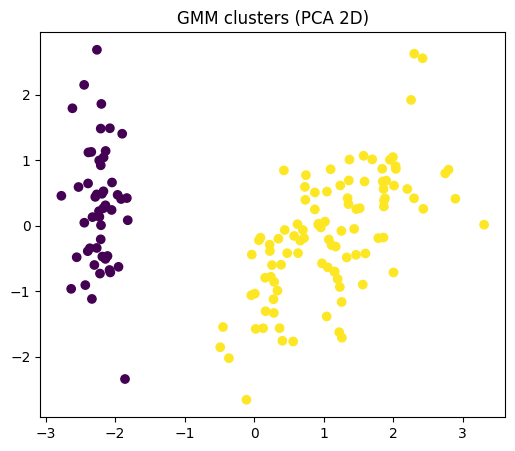

In [6]:
# Visualize clusters on PCA
viz_gmm = GaussianMixture(n_components=best_n, covariance_type='full', random_state=0)
viz_gmm.fit(X_pca)
viz_labels = viz_gmm.predict(X_pca)
plt.figure()
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(X_pca[:,0], X_pca[:,1], c=viz_labels)
ax.set_title('GMM clusters (PCA 2D)')
plt.show()